<a href="https://colab.research.google.com/github/TareDevarsh/machine_learning/blob/master/Stock_anaysis_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q sklearn

In [0]:
import math
import pandas_datareader as rd
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df_stock = rd.DataReader('AAPL', data_source='yahoo',start = '2012-01-03',end='2020-05-18')
df_stock.head(5)

df_close = df_stock.filter(['Close'])

dataset = df_close.values 

data_len = math.ceil(len(dataset)*.85)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

data_train = scaled_data[0:data_len,:] 

x_train = []
y_train = []

for i in range(60 , len(data_train)):
  x_train.append(data_train[i-60:i ,0])
  y_train.append(data_train[i , 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = tf.keras.models.load_model('model/Stock_analysis.h5')

In [0]:
data_test = scaled_data[data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(data_test)):
    x_test.append(data_test[i-60:i,0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [12]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

8.284326570385206

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


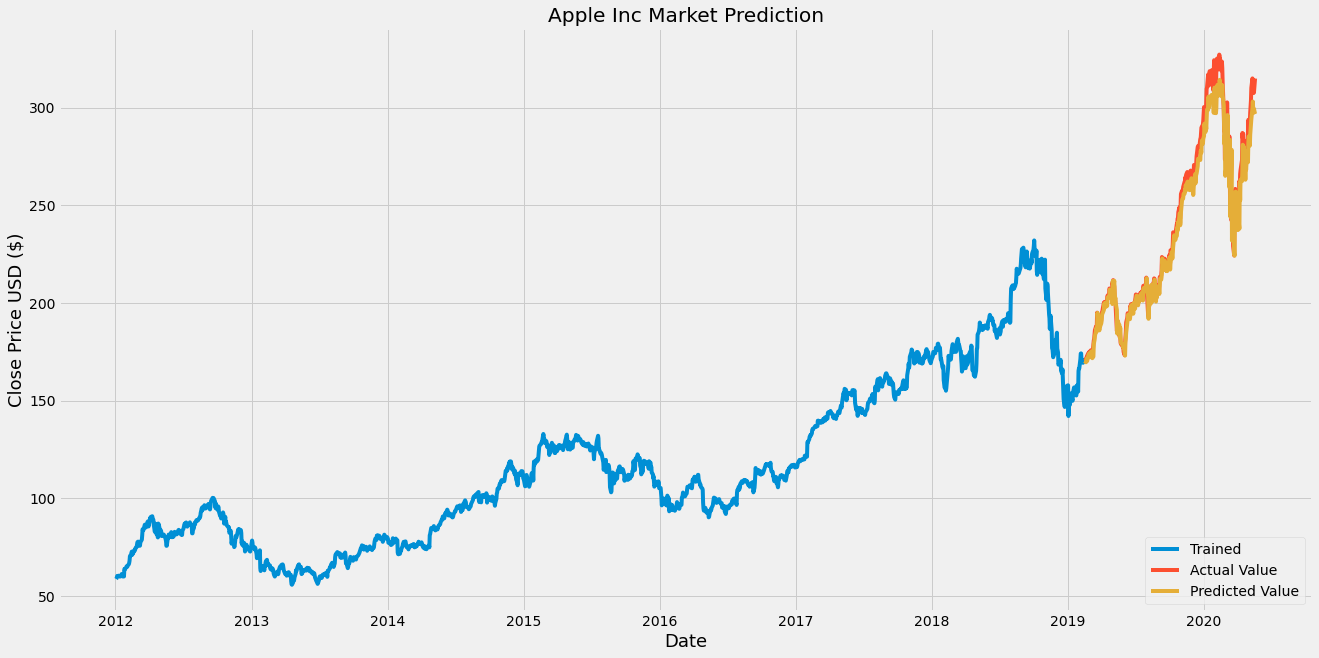

In [13]:
#Plot/Create the data for the graph
train = df_close[:data_len]
valid = df_close[data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(20,10))
plt.title('Apple Inc Market Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Trained', 'Actual Value', 'Predicted Value'], loc='lower right')
plt.show()

In [14]:
apple_quote = rd.DataReader('AAPL', data_source='yahoo',start = '2012-01-03',end='2020-05-22')

#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[307.10324]]


In [15]:
apple_quote2 = rd.DataReader('AAPL', data_source='yahoo',start = '2020-05-23',end='2020-05-23')
apple_quote2['Close']

Date
2020-05-22    318.890015
Name: Close, dtype: float64